### Trabalho 3: Machine Learning
### Turma MBED: Turma 1

## Integrantes do grupo:
- Victor Hugo Ciurlino
- Euripedes Antônio da Silva Junior
- Ricardo Nascimento de Souza
- Danúbia Carvalho Gomes Cantanhede
- Pedro Henrique Ferminío Britto

# importação das bibliotecas:

In [13]:
import pandas as pd
import math
import sys

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


from scipy.stats import pearsonr

import pandas as pd
import math
import sys
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


from scipy.stats import pearsonr


# Iniciação das funções

In [3]:
atributo1 = "RM"
atributo2 = "PTRATIO"
dados = pd.read_excel("datasets/D02_Boston.xlsx")
dados = dados.iloc[:,1:]
dados = dados[[
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'target'
    ]]


# Geração e análise dos dados de treino e teste

Colunas disponíveis:
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')
      CRIM = -0.386
        ZN =  0.360
     INDUS = -0.484
      CHAS =  0.175
       NOX = -0.427
        RM =  0.695
       AGE = -0.377
       DIS =  0.250
       RAD = -0.382
       TAX = -0.469
   PTRATIO = -0.508
         B =  0.333
     LSTAT = -0.738
    target =  1.000


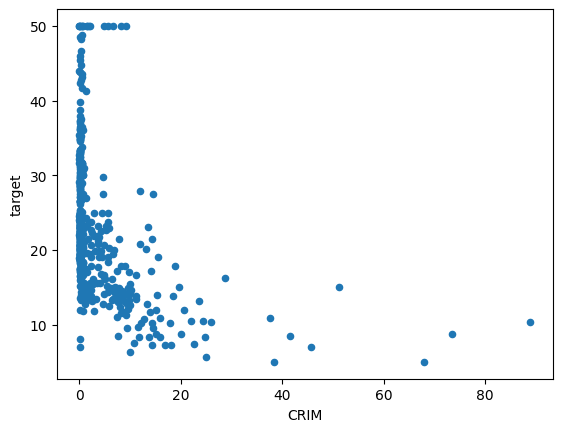

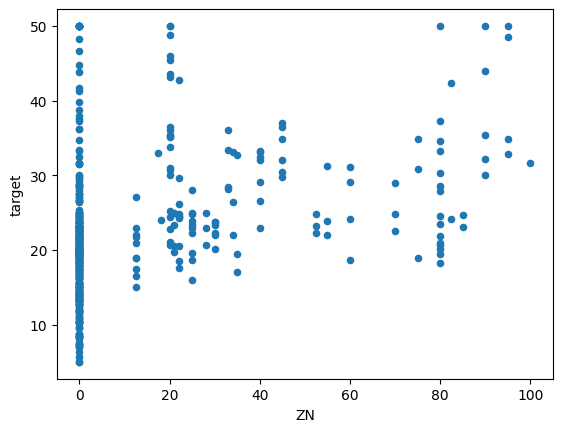

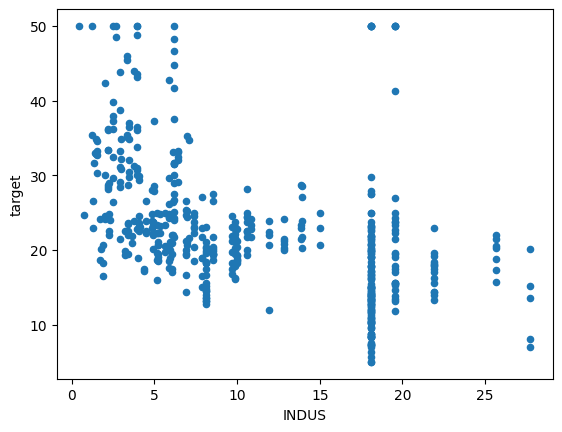

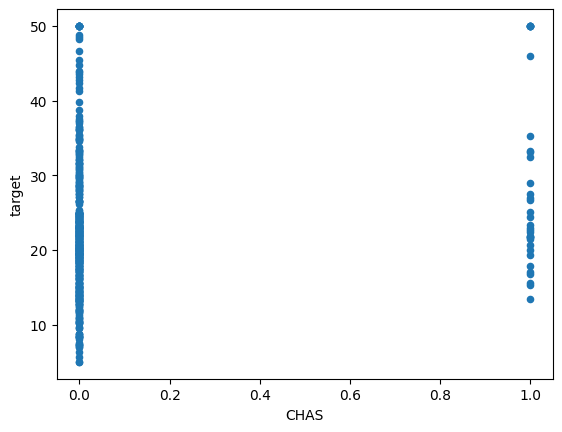

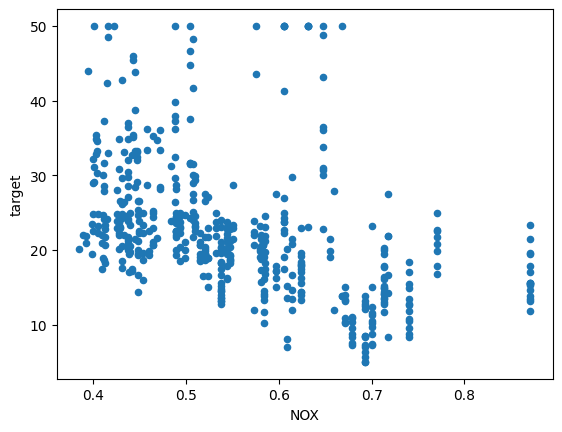

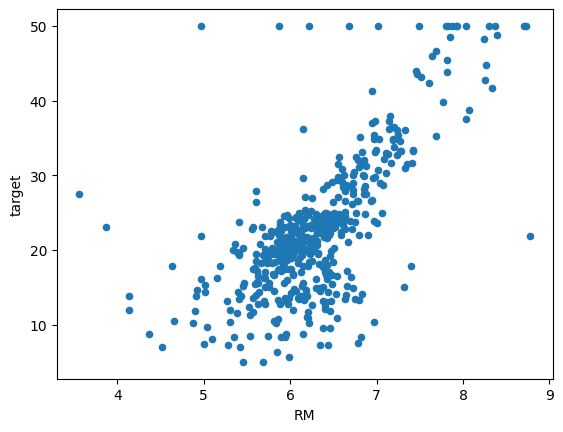

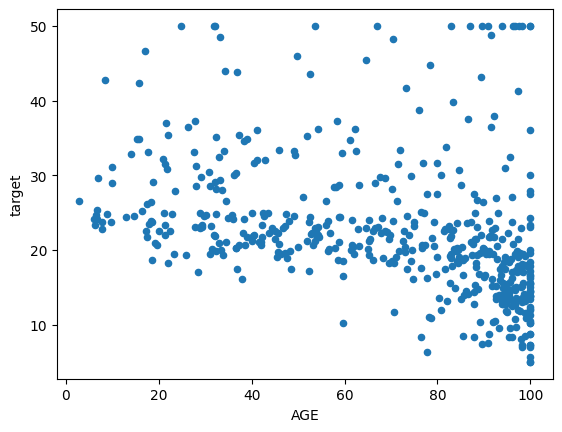

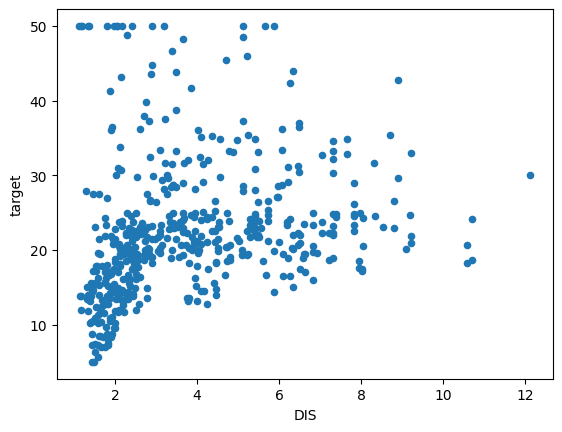

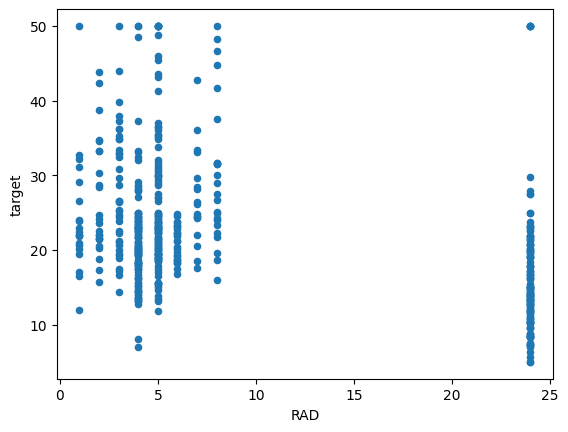

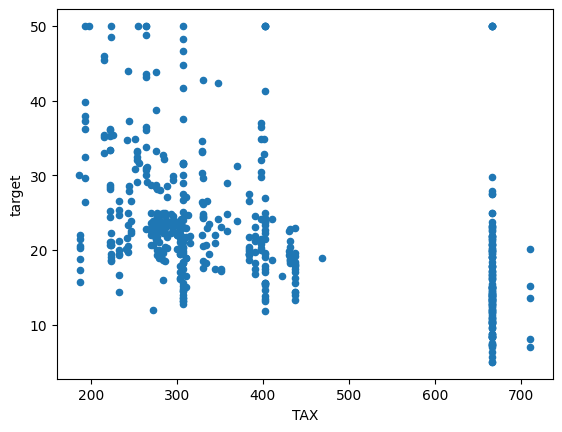

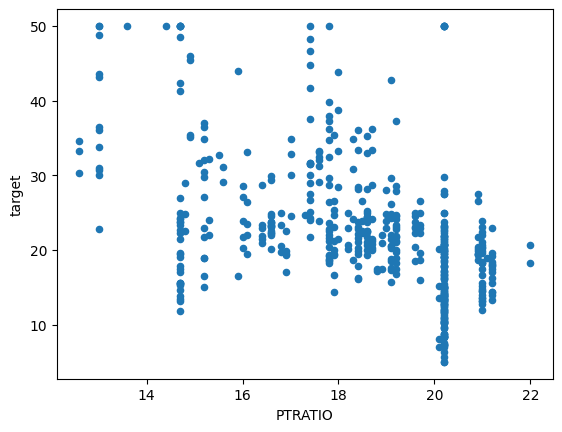

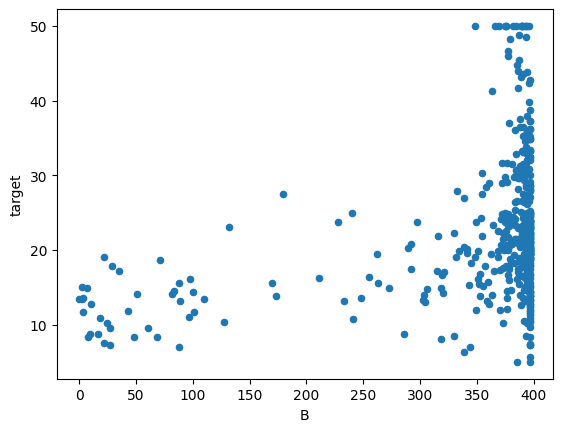

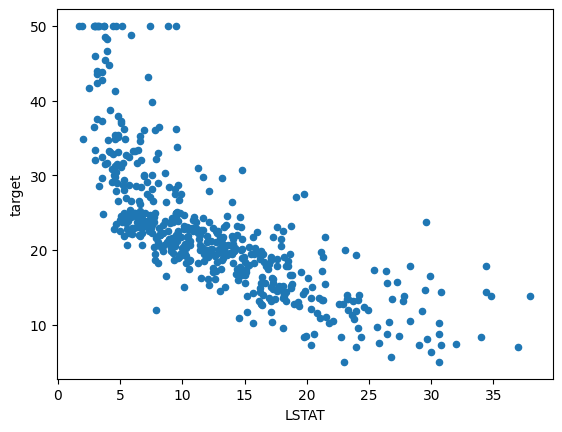

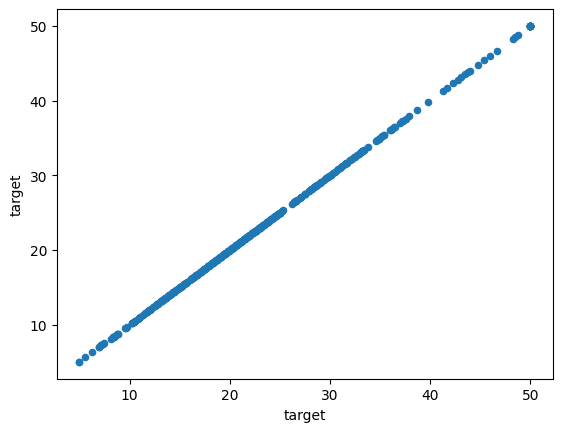

In [4]:
colunas = dados.columns

print("Colunas disponíveis:")
print(colunas)

for col in colunas:
    dados.plot.scatter(x=col,y='target')

for col in colunas:
    print('%10s = %6.3f' % ( col , pearsonr(dados[col],dados['target'])[0] ) )

In [5]:
X = dados.iloc[:, :-1].values
y = dados.iloc[:, -1].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size = 200,
        random_state = 0
)

In [6]:
print('%10s = %6.3f' % (
    atributo1+'_'+atributo2,
    pearsonr(dados[atributo1],dados[atributo2])[0] ) )

RM_PTRATIO = -0.356


## Avaliação dos melhores parâmetros para cada modelo

In [ ]:
def avalia_parametros(modelo, param_grid, x_treino, y_treino):
    grid_search = GridSearchCV(modelo, param_grid, cv=5, return_train_score=True)
    
    # Ajustando o modelo com os dados de treinamento
    grid_search.fit(x_treino, y_treino)

    # Imprimindo os resultados da busca em grade
    print("Melhores parâmetros: {}".format(grid_search.best_params_))
    print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))
    k = grid_search.best_params_['n_neighbors']
    weights = grid_search.best_params_['weights']

    return grid_search.best_params_

In [ ]:
lista_modelos = [KNeighborsRegressor(),MinMaxScaler(),PolynomialFeatures(),LinearRegression()]
lista_parametros = [
    {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    {
        'feature_range': [(0, 1), (-1, 1)]
    },
    {
        'degree': [2, 3],
        'include_bias': [True, False]
    },
    {
        'fit_intercept': [True, False],
        'normalize': [True, False]
    }
]

for model, hyperparameter in zip(lista_modelos, lista_parametros):
    print("Novo modelo:")
    # Create a grid search object to find the best hyperparameters for the current model
    clf = GridSearchCV(model, hyperparameter, cv=5, return_train_score=True)

    # Fit the grid search object to the training data
    clf.fit(x_treino, y_treino)
    print("Melhores parâmetros: {}".format(clf.best_params_))
    print("Melhor pontuação de validação cruzada: {:.2f}".format(clf.best_score_))
    # Make predictions on the test data using the best model found by the grid search
    y_pred = clf.predict(x_teste)

# Execução e análise dos modelos

In [7]:
K=1

modelo = KNeighborsRegressor( n_neighbors = K, weights='uniform' )
modelo = modelo.fit(X_train, y_train)
y_resposta = modelo.predict(X_test)

for k in range(1,21):

    knn = KNeighborsRegressor(
            n_neighbors=k,
            weights='uniform'
            )

    knn = knn.fit(X_train, y_train)

    y_resposta  = knn.predict(X_test)

    erro = math.sqrt ( mean_squared_error ( y_test  , y_resposta  ) )

    print ( str ( '   %2d' % k    ) + '  ' +
            str ( '%10.4f' % erro )
          )

for k in range(1,21):

    knn = KNeighborsRegressor(
            n_neighbors=k,
            weights='distance'
            )

    knn = knn.fit(X_train, y_train)

    y_resposta  = knn.predict(X_test)

    erro = math.sqrt ( mean_squared_error ( y_test  , y_resposta  ) )

    print ( str ( '   %2d' % k    ) + '  ' +
            str ( '%10.4f' % erro )
          )

    1      7.5980
    2      6.1099
    3      5.9883
    4      6.2605
    5      6.2978
    6      6.5584
    7      6.3251
    8      6.4417
    9      6.4414
   10      6.4822
   11      6.6491
   12      6.7369
   13      6.8809
   14      6.9167
   15      6.9759
   16      7.0241
   17      7.0536
   18      7.0503
   19      7.0877
   20      7.1435
    1      7.5980
    2      6.1045
    3      5.9494
    4      6.0328
    5      6.0179
    6      6.1795
    7      6.0256
    8      6.0756
    9      6.0768
   10      6.1088
   11      6.1941
   12      6.2507
   13      6.3369
   14      6.3792
   15      6.4259
   16      6.4717
   17      6.5121
   18      6.5108
   19      6.5478
   20      6.5881


In [9]:
scaler  = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

modelo = LinearRegression()
modelo = modelo.fit(X_train, y_train)

y_resposta  = modelo.predict(X_test)

erro = math.sqrt ( mean_squared_error ( y_test  , y_resposta  ) )

print ( str ( '   %2d' % k    ) + '  ' +
        str ( '%10.4f' % erro )
      )

   20      5.0739


In [10]:
for g in range(1,6):

    pf = PolynomialFeatures(degree=g)

    pf = pf.fit(X_train)
    X_train_poly = pf.transform(X_train)
    X_test_poly = pf.transform(X_test)

    regressor_linear = LinearRegression()

    regressor_linear = regressor_linear.fit(X_train_poly,y_train)

    y_resposta_teste  = regressor_linear.predict(X_test_poly)

    mse_out  = mean_squared_error(y_test,y_resposta_teste)
    rmse_out = math.sqrt(mse_out)
    r2_out   = r2_score(y_test,y_resposta_teste)

    print(' %4d  %10d  %17.4f  %17.4f' % ( g , X_train_poly.shape[1], rmse_out , r2_out ) )


    1          14             5.0739             0.6851
    2         105             4.1688             0.7874
    3         560            35.2589           -14.2057
    4        2380            18.0612            -2.9899
    5        8568            15.2390            -1.8404


In [11]:
for g in range(1,10):

    pf = PolynomialFeatures(degree=g)

    pf = pf.fit(X_train)
    X_train_poly = pf.transform(X_train)
    X_test_poly = pf.transform(X_test)

    regressor_linear = LinearRegression()

    regressor_linear = regressor_linear.fit(X_train_poly,y_train)

    y_resposta_treino = regressor_linear.predict(X_train_poly)
    y_resposta_teste  = regressor_linear.predict(X_test_poly)

    mse_in  = mean_squared_error(y_train,y_resposta_treino)
    rmse_in = math.sqrt(mse_in)
    mse_out  = mean_squared_error(y_test,y_resposta_teste)
    rmse_out = math.sqrt(mse_out)

    print(' %4d  %10d  %17.4f  %17.4f' % ( g , X_train_poly.shape[1], rmse_in, rmse_out ) )


    1          14             4.4738             5.0739
    2         105             1.9288             4.1688
    3         560             0.0000            35.2589
    4        2380             0.0000            18.0612
    5        8568             0.0000            15.2390
    6       27132             0.0000            14.0130
    7       77520             0.0000            13.4939
    8      203490             0.0000            13.2894
    9      497420             0.0000            13.2483


In [ ]:
X_train, X_test, y_train, y_test

In [15]:
modelo = LinearRegression()
modelo_ridge = Ridge ( alpha = np.power(10,-3.8) )
modelo_lasso = Lasso ( alpha = np.power(10,-3.7), max_iter=10000000 )

for degree in range(1,9):

    pf = PolynomialFeatures(degree)
    modelo = LinearRegression()

    # treinamento dos três modelos

    X_train_poly = pf.fit_transform(X_train)

    modelo = modelo.fit(X_train_poly, y_train)

    modelo_ridge = modelo_ridge.fit ( X_train_poly , y_train )
    modelo_lasso = modelo_lasso.fit ( X_train_poly , y_train )

    # predict dentro da amostra

    y_train_pred = modelo.predict(X_train_poly)

    y_train_pred_ridge = modelo_ridge.predict(X_train_poly)
    y_train_pred_lasso = modelo_lasso.predict(X_train_poly)

    # predict fora da amostra

    X_test_poly = pf.transform(X_test)

    y_test_pred = modelo.predict(X_test_poly)

    y_test_pred_ridge = modelo_ridge.predict(X_test_poly)
    y_test_pred_lasso = modelo_lasso.predict(X_test_poly)

    # calcular os erros

    RMSE_in  = math.sqrt ( mean_squared_error ( y_train , y_train_pred ) )
    RMSE_out = math.sqrt ( mean_squared_error ( y_test  , y_test_pred  ) )

    RMSE_in_ridge  = math.sqrt ( mean_squared_error ( y_train , y_train_pred_ridge ) )
    RMSE_out_ridge = math.sqrt ( mean_squared_error ( y_test  , y_test_pred_ridge  ) )

    RMSE_in_lasso  = math.sqrt ( mean_squared_error ( y_train , y_train_pred_lasso ) )
    RMSE_out_lasso = math.sqrt ( mean_squared_error ( y_test  , y_test_pred_lasso  ) )

    print ( str ( '   %2d' % degree   ) + '  ' +
            str ( '%10.4f' % RMSE_in  ) + '  ' +
            str ( '%10.4f' % RMSE_out ) + '  |' +
            str ( '%10.4f' % RMSE_in_ridge  ) + '  ' +
            str ( '%10.4f' % RMSE_out_ridge ) + '  |' +
            str ( '%10.4f' % RMSE_in_lasso  ) + '  ' +
            str ( '%10.4f' % RMSE_out_lasso )
          )


    1      4.4738      5.0739  |    4.4738      5.0739  |    4.4738      5.0742
    2      1.9288      4.1688  |    1.9521      4.0860  |    1.9836      3.9364
    3      0.0000     35.2589  |    0.8158      4.8865  |    1.2959      3.6264
